# Import lib

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Get dataset

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = data['YearsExperience']
y = data['Salary']

# Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1 , 1)

In [7]:
linear = LinearRegression()

# Model predict without KFold

In [8]:
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print('MSE: ', mean_squared_error(y_pred, y_test))
print('R2 score: ', r2_score(y_pred, y_test))

MSE:  12823412.298126549
R2 score:  0.986482673117654


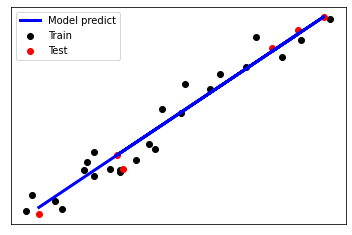

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='black', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Model predict')
plt.legend()

plt.xticks(())
plt.yticks(())

plt.show()

# Kfold cross-validation

In [11]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

In [38]:
splits = 5
r2 = 0
mse = 0
count = 1
R2 = []
MSE = []

for train_idx, test_idx in cv.split(X, y):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2 += r2_score(y_pred, y_test)
  mse += mean_squared_error(y_pred, y_test)
  R2.append(r2)
  MSE.append(mse)

  print(f'R2 with fold {count} : {r2_score(y_pred, y_test)}')
  print(f'MSE with fold {count} : {mean_squared_error(y_pred, y_test)} \n')
  count += 1

r2 /= splits
mse /= splits

R2 with fold 1 : 0.24924748058451995
MSE with fold 1 : 25905138.76967999 

R2 with fold 2 : -1.331449274491154
MSE with fold 2 : 30974669.998575736 

R2 with fold 3 : -1.881772133038969
MSE with fold 3 : 59780662.11837491 

R2 with fold 4 : -0.09039594251697336
MSE with fold 4 : 68417038.21806611 

R2 with fold 5 : 0.14373929066069802
MSE with fold 5 : 35766738.23965806 



# Evaluation and plot

In [30]:
print('R2: ', r2)
print('MSE: ', mse)

R2:  -0.5821261157603758
MSE:  44168849.46887096


<function matplotlib.pyplot.show>

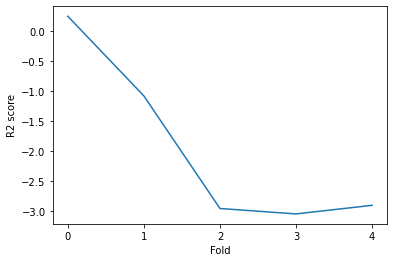

In [44]:
plt.plot(R2)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Fold')
plt.ylabel('R2 score')
plt.show

<function matplotlib.pyplot.show>

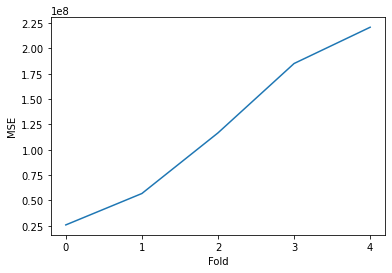

In [45]:
plt.plot(MSE)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show